In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sbn
plt.rcParams["figure.figsize"]=13,7
plt.style.use('dark_background')

In [2]:
data = pd.read_csv(r'C:\Users\ss\Desktop\student performance in exam\StudentsPerformance.csv')
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


# DATA EXPLORATION

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [7]:
data['race/ethnicity'].count()

1000

In [8]:
data.size

8000

In [9]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [10]:
data.shape

(1000, 8)

In [11]:
data.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 43.0+ KB


In [13]:
data['race/ethnicity'].value_counts()


group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [14]:
data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [15]:
data['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [16]:
data['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [17]:
data['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

In [18]:
data.drop(['test preparation course'],1,inplace=True)

In [19]:
data.head(2)

,gender,race/ethnicity,parental level of education,lunch,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,72,72,74
1,female,group C,some college,standard,69,90,88


In [20]:
data['total_score']=round((data['math score'] + data ['reading score'] + data['writing score']) / 3)
data

,gender,race/ethnicity,parental level of education,lunch,math score,reading score,writing score,total_score
0,female,group B,bachelor's degree,standard,72,72,74,73.0
1,female,group C,some college,standard,69,90,88,82.0
2,female,group B,master's degree,standard,90,95,93,93.0
3,male,group A,associate's degree,free/reduced,47,57,44,49.0
4,male,group C,some college,standard,76,78,75,76.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,88,99,95,94.0
996,male,group C,high school,free/reduced,62,55,55,57.0
997,female,group C,high school,free/reduced,59,71,65,65.0
998,female,group D,some college,standard,68,78,77,74.0


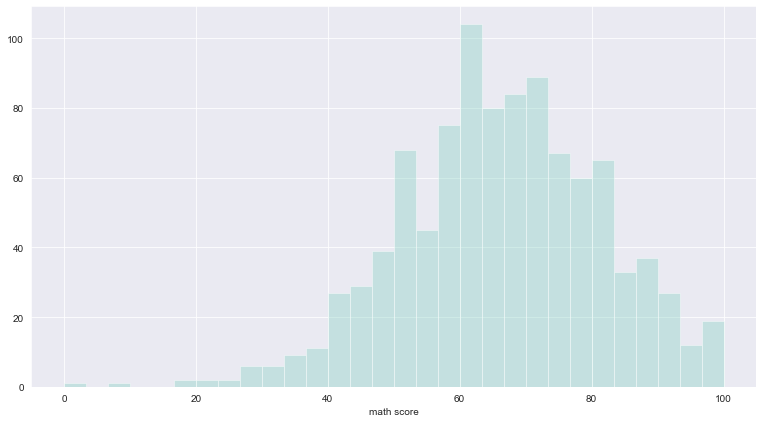

In [21]:
sbn.set_style('darkgrid')
sbn.distplot(data['math score'],kde=False,bins=30)

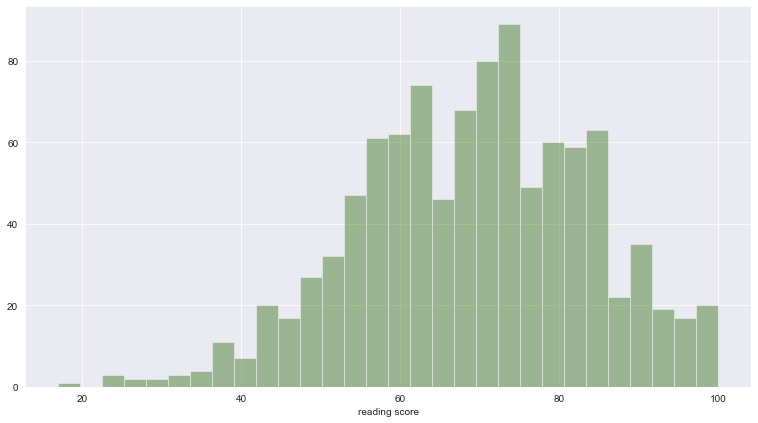

In [22]:
sbn.distplot(data['reading score'],kde=False,bins=30,color='#226600')

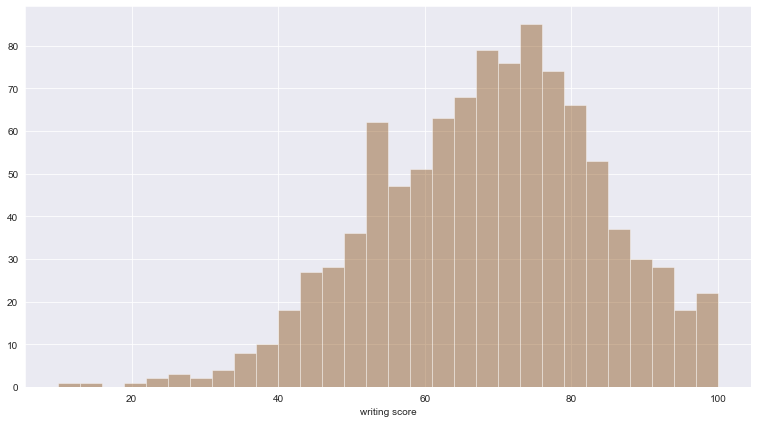

In [23]:
sbn.distplot(data['writing score'],kde=False,bins=30,color='#804000')

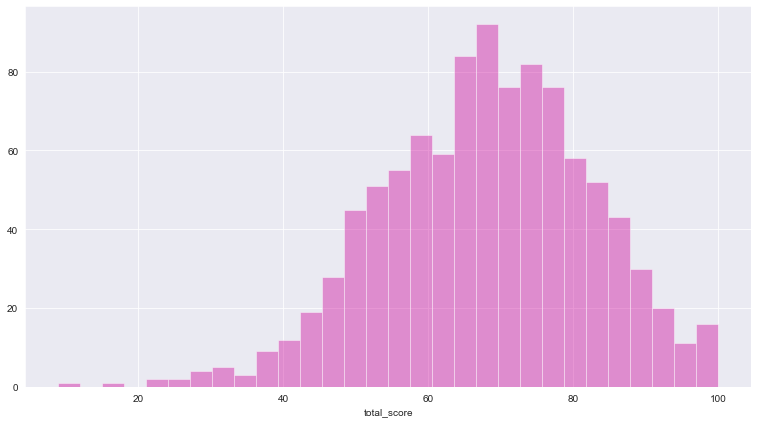

In [24]:
sbn.distplot(data['total_score'],kde=False,bins=30,color='#cc0099')

# GROUP A

In [25]:
group_A = data['race/ethnicity']=='group A'
group_a = data.loc[group_A,['gender','race/ethnicity','parental level of education','math score','reading score','writing score','total_score']]
group_a

,gender,race/ethnicity,parental level of education,math score,reading score,writing score,total_score
3,male,group A,associate's degree,47,57,44,49.0
13,male,group A,some college,78,72,70,73.0
14,female,group A,master's degree,50,53,58,54.0
25,male,group A,master's degree,73,74,72,73.0
46,female,group A,associate's degree,55,65,62,61.0
...,...,...,...,...,...,...,...
974,female,group A,some college,54,63,67,61.0
983,female,group A,some college,78,87,91,85.0
985,male,group A,high school,57,51,54,54.0
988,female,group A,some high school,44,45,45,45.0


In [136]:
passing_score = 45.0
group_a['status']= np.where (group_a['total_score']>passing_score,'P','F')
group_a

,gender,race/ethnicity,parental level of education,math score,reading score,writing score,total_score,Grade,status
3,male,group A,associate's degree,47,57,44,49.0,P,P
46,female,group A,associate's degree,55,65,62,61.0,P,P
62,male,group A,associate's degree,62,61,55,59.0,P,P
72,female,group A,associate's degree,41,51,48,47.0,P,P
112,male,group A,associate's degree,54,53,47,51.0,P,P
...,...,...,...,...,...,...,...,...,...
61,male,group A,some high school,39,39,34,37.0,F,F
296,male,group A,some high school,46,41,43,43.0,F,F
384,female,group A,some high school,38,43,43,41.0,F,F
810,male,group A,some high school,51,31,36,39.0,F,F


In [137]:
group_a['status'].value_counts()

P    81
F     8
Name: status, dtype: int64

In [30]:
result=group_a['Grade'].value_counts()
result
colors=['#0099cc','#ff1a1a']

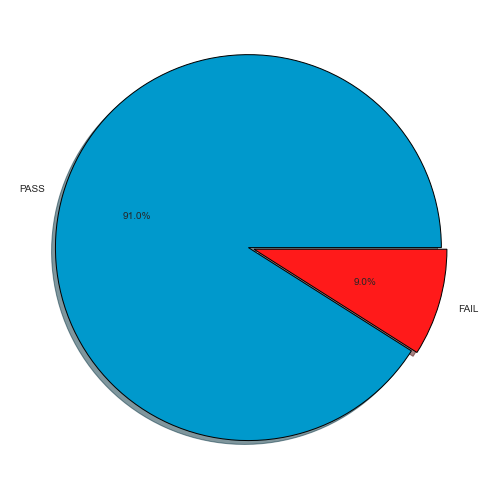

In [31]:
plt.pie(result,wedgeprops={'edgecolor':'black'},shadow=True,labels=['PASS','FAIL'],explode=[0,0.03],colors=colors,autopct='%1.1f%%')
plt.tight_layout()
plt.show()

In [145]:
lvl_of_edu=group_a.groupby(['parental level of education','total_score','gender']).mean()
lvl_of_edu

math score  reading score  \
parental level of education total_score gender                              
associate's degree          47.0        female        41.0           51.0   
                            49.0        male          43.5           56.0   
                            50.0        female        37.0           57.0   
                            51.0        male          54.0           53.0   
                            59.0        male          64.5           59.0   
...                                                    ...            ...   
some high school            75.0        female        59.0           85.0   
                            77.0        female        71.0           83.0   
                            78.0        male          79.0           82.0   
                            89.0        female        85.0           90.0   
                            96.0        female        92.0          100.0   

                                                writing score  
parental level of education total_score gender                 
associate's degree          47.0        female           48.0  
                            49.0        male             48.5  
                            50.0        female           56.0  
                            51.0        male             47.0  
                            59.0        male             54.0  
...                                                       ...  
some high school            75.0        female           80.0  
                            77.0        female           77.0  
                            78.0        male             73.0  
                            89.0        female           92.0  
                            96.0        female           97.0  

[79 rows x 3 columns]

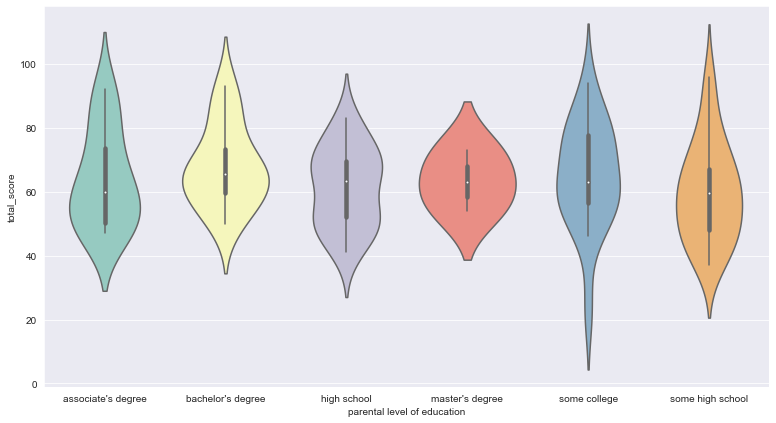

In [141]:
sbn.violinplot(x='parental level of education',y='total_score',data=group_a)

c:\users\ss\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


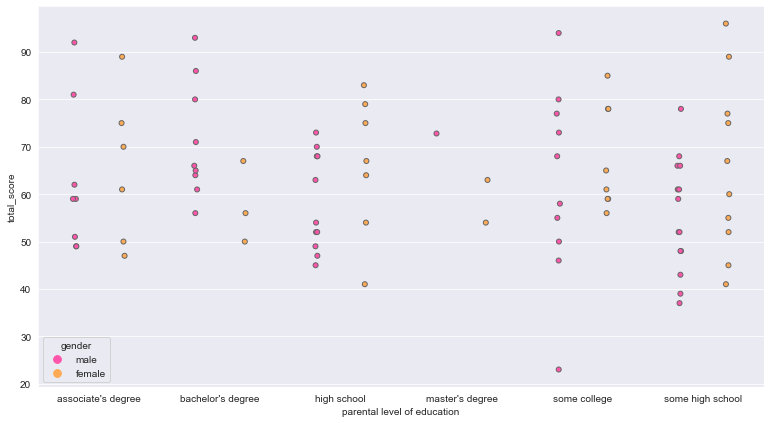

In [142]:
sbn.stripplot(x='parental level of education',y='total_score',data=group_a,jitter=0.03,linewidth=1,hue='gender',split=True,palette='spring')

In [144]:
group_a.groupby(['parental level of education','status']).count()

gender  race/ethnicity  math score  \
parental level of education status                                       
associate's degree          P           14              14          14   
bachelor's degree           P           12              12          12   
high school                 F            2               2           2   
                            P           16              16          16   
master's degree             P            3               3           3   
some college                F            1               1           1   
                            P           17              17          17   
some high school            F            5               5           5   
                            P           19              19          19   

                                    reading score  writing score  total_score  \
parental level of education status                                              
associate's degree          P                  14             14           14   
bachelor's degree           P                  12             12           12   
high school                 F                   2              2            2   
                            P                  16             16           16   
master's degree             P                   3              3            3   
some college                F                   1              1            1   
                            P                  17             17           17   
some high school            F                   5              5            5   
                            P                  19             19           19   

                                    Grade  
parental level of education status         
associate's degree          P          14  
bachelor's degree           P          12  
high school                 F           2  
                            P          16  
master's degree             P           3  
some college                F           1  
                            P          17  
some high school            F           5  
                            P          19

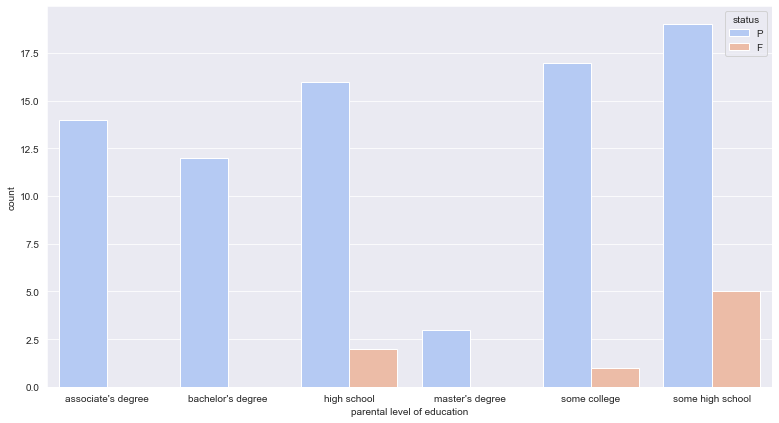

In [146]:
sbn.countplot(x='parental level of education',data=group_a,hue='status',palette='coolwarm')

In [147]:
group_a.groupby(['parental level of education','gender']).count()

race/ethnicity  math score  reading score  \
parental level of education gender                                              
associate's degree          female               6           6              6   
                            male                 8           8              8   
bachelor's degree           female               3           3              3   
                            male                 9           9              9   
high school                 female               7           7              7   
                            male                11          11             11   
master's degree             female               2           2              2   
                            male                 1           1              1   
some college                female               8           8              8   
                            male                10          10             10   
some high school            female              10          10             10   
                            male                14          14             14   

                                    writing score  total_score  Grade  status  
parental level of education gender                                             
associate's degree          female              6            6      6       6  
                            male                8            8      8       8  
bachelor's degree           female              3            3      3       3  
                            male                9            9      9       9  
high school                 female              7            7      7       7  
                            male               11           11     11      11  
master's degree             female              2            2      2       2  
                            male                1            1      1       1  
some college                female              8            8      8       8  
                            male               10           10     10      10  
some high school            female             10           10     10      10  
                            male               14           14     14      14

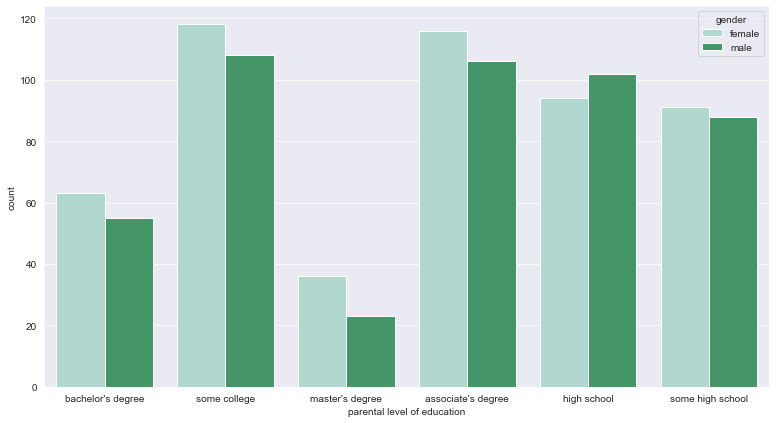

In [149]:
sbn.countplot(x='parental level of education',data=data,hue='gender',palette='BuGn')

In [150]:
def grade (marks):
    if (marks>=90):
        return 'O'
    elif (marks>=75) and(marks<90):
        return 'A'
    elif (marks>=60) and(marks<75):
        return 'B'
    elif (marks>=45) and(marks<60):
        return 'C'
    else:
        return 'F'
    

In [151]:
group_a['grade']=group_a['total_score'].apply(grade)

In [152]:
group_a

,gender,race/ethnicity,parental level of education,math score,reading score,writing score,total_score,Grade,status,grade
3,male,group A,associate's degree,47,57,44,49.0,P,P,C
46,female,group A,associate's degree,55,65,62,61.0,P,P,B
62,male,group A,associate's degree,62,61,55,59.0,P,P,C
72,female,group A,associate's degree,41,51,48,47.0,P,P,C
112,male,group A,associate's degree,54,53,47,51.0,P,P,C
...,...,...,...,...,...,...,...,...,...,...
61,male,group A,some high school,39,39,34,37.0,F,F,F
296,male,group A,some high school,46,41,43,43.0,F,F,F
384,female,group A,some high school,38,43,43,41.0,F,F,F
810,male,group A,some high school,51,31,36,39.0,F,F,F


In [159]:
group_a.groupby(['grade']).count()

,gender,race/ethnicity,parental level of education,math score,reading score,writing score,total_score,Grade,status
grade,,,,,,,,,
A,17,17,17,17,17,17,17,17,17
B,29,29,29,29,29,29,29,29,29
C,33,33,33,33,33,33,33,33,33
F,6,6,6,6,6,6,6,6,6
O,4,4,4,4,4,4,4,4,4


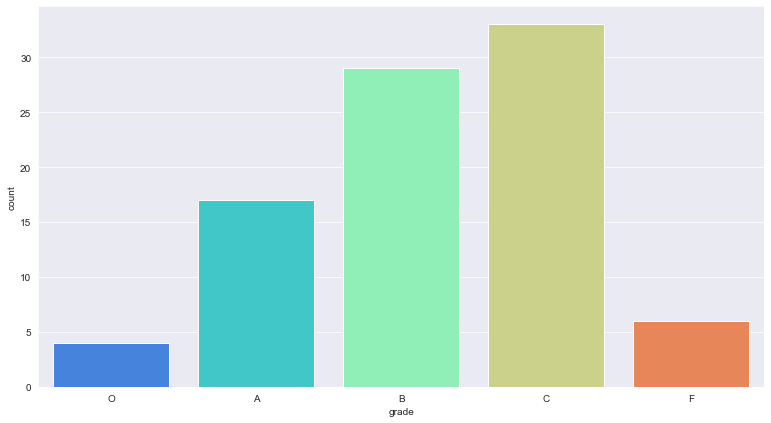

In [162]:
sbn.countplot(x='grade',data=group_a,palette='rainbow',order=['O','A','B','C','F'])

In [153]:
group_a.groupby(['parental level of education','grade']).count()

gender  race/ethnicity  math score  \
parental level of education grade                                       
associate's degree          A           3               3           3   
                            B           3               3           3   
                            C           7               7           7   
                            O           1               1           1   
bachelor's degree           A           2               2           2   
                            B           6               6           6   
                            C           3               3           3   
                            O           1               1           1   
high school                 A           3               3           3   
                            B           7               7           7   
                            C           7               7           7   
                            F           1               1           1   
master's degree             B           2               2           2   
                            C           1               1           1   
some college                A           5               5           5   
                            B           4               4           4   
                            C           7               7           7   
                            F           1               1           1   
                            O           1               1           1   
some high school            A           4               4           4   
                            B           7               7           7   
                            C           8               8           8   
                            F           4               4           4   
                            O           1               1           1   

                                   reading score  writing score  total_score  \
parental level of education grade                                              
associate's degree          A                  3              3            3   
                            B                  3              3            3   
                            C                  7              7            7   
                            O                  1              1            1   
bachelor's degree           A                  2              2            2   
                            B                  6              6            6   
                            C                  3              3            3   
                            O                  1              1            1   
high school                 A                  3              3            3   
                            B                  7              7            7   
                            C                  7              7            7   
                            F                  1              1            1   
master's degree             B                  2              2            2   
                            C                  1              1            1   
some college                A                  5              5            5   
                            B                  4              4            4   
                            C                  7              7            7   
                            F                  1              1            1   
                            O                  1              1            1   
some high school            A                  4              4            4   
                            B                  7              7            7   
                            C                  8              8            8   
                            F                  4              4            4   
                            O                  1              1            1   

                                   Grade  status  
pare

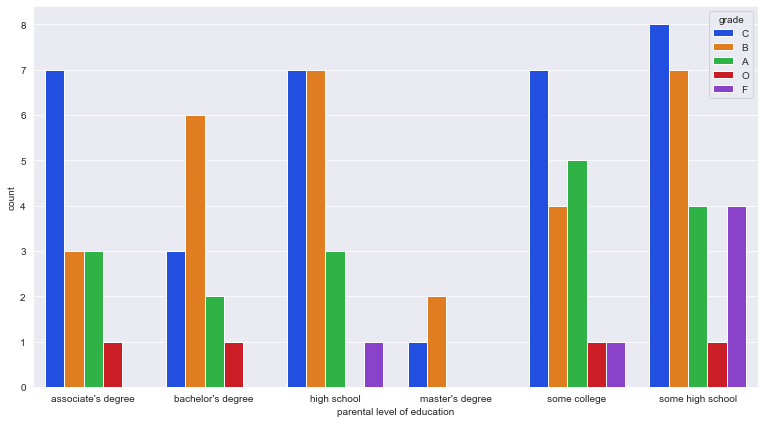

In [158]:
sbn.countplot(x='parental level of education',data=group_a,hue='grade',palette='bright',order=["associate's degree","bachelor's degree","high school","master's degree","some college","some high school"])

# GROUP B

In [36]:
group_B = data['race/ethnicity']=='group B'
group_b = data.loc[group_B,['gender','race/ethnicity','parental level of education','math score','reading score','writing score','total_score']]
group_b

,gender,race/ethnicity,parental level of education,math score,reading score,writing score,total_score
0,female,group B,bachelor's degree,72,72,74,73.0
2,female,group B,master's degree,90,95,93,93.0
5,female,group B,associate's degree,71,83,78,77.0
6,female,group B,some college,88,95,92,92.0
7,male,group B,some college,40,43,39,41.0
...,...,...,...,...,...,...,...
969,female,group B,bachelor's degree,75,84,80,80.0
976,male,group B,some college,60,62,60,61.0
980,female,group B,high school,8,24,23,18.0
982,male,group B,some high school,79,85,86,83.0


In [37]:
passing_score=45.0
group_b['status']=np.where(group_b['total_score']>passing_score,'P','F')


In [38]:
group_b

,gender,race/ethnicity,parental level of education,math score,reading score,writing score,total_score,status
0,female,group B,bachelor's degree,72,72,74,73.0,P
2,female,group B,master's degree,90,95,93,93.0,P
5,female,group B,associate's degree,71,83,78,77.0,P
6,female,group B,some college,88,95,92,92.0,P
7,male,group B,some college,40,43,39,41.0,F
...,...,...,...,...,...,...,...,...
969,female,group B,bachelor's degree,75,84,80,80.0,P
976,male,group B,some college,60,62,60,61.0,P
980,female,group B,high school,8,24,23,18.0,F
982,male,group B,some high school,79,85,86,83.0,P


In [39]:
result=group_b['status'].value_counts()
result

P    175
F     15
Name: status, dtype: int64

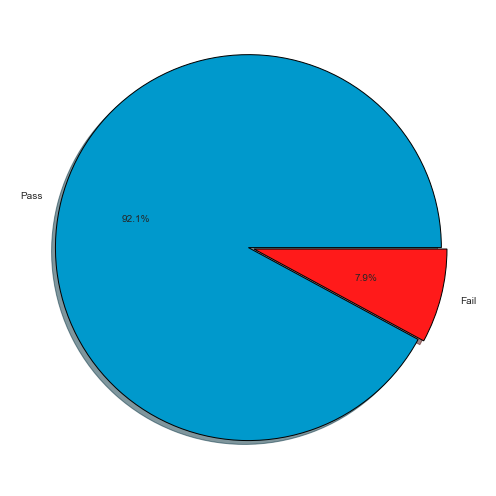

In [40]:
plt.pie(result,wedgeprops={'edgecolor':'black'},autopct='%1.1f%%',shadow=True,explode=[0,0.03],colors=colors,labels=['Pass','Fail'])
plt.tight_layout()
plt.show()

In [41]:
def grade (marks):
    if (marks>=90):
        return 'O'
    elif (marks>=75) and (marks<90):
        return 'A'
    elif (marks>60) and (marks<75):
        return 'B'
    elif (marks>=45) and (marks<60):
        return 'C'
    else:
        return 'F'
    

In [42]:
group_b['grade']=group_b['total_score'].apply(grade)

In [43]:
group_b

,gender,race/ethnicity,parental level of education,math score,reading score,writing score,total_score,status,grade
0,female,group B,bachelor's degree,72,72,74,73.0,P,B
2,female,group B,master's degree,90,95,93,93.0,P,O
5,female,group B,associate's degree,71,83,78,77.0,P,A
6,female,group B,some college,88,95,92,92.0,P,O
7,male,group B,some college,40,43,39,41.0,F,F
...,...,...,...,...,...,...,...,...,...
969,female,group B,bachelor's degree,75,84,80,80.0,P,A
976,male,group B,some college,60,62,60,61.0,P,B
980,female,group B,high school,8,24,23,18.0,F,F
982,male,group B,some high school,79,85,86,83.0,P,A


In [44]:
lvl_of_edu=group_b.groupby(['parental level of education','total_score','gender']).mean()
lvl_of_edu

math score  reading score  \
parental level of education total_score gender                              
associate's degree          41.0        male          44.0           41.0   
                            45.0        male          48.0           43.0   
                            46.0        female        40.0           48.0   
                            48.0        male          61.0           42.0   
                            49.0        female        47.0           49.0   
...                                                    ...            ...   
some high school            81.0        male          84.0           83.0   
                            82.0        male          86.5           84.0   
                            83.0        male          79.0           85.0   
                            84.0        female        74.0           90.0   
                            89.0        male          94.0           86.0   

                                                writing score  
parental level of education total_score gender                 
associate's degree          41.0        male             38.0  
                            45.0        male             45.0  
                            46.0        female           50.0  
                            48.0        male             41.0  
                            49.0        female           50.0  
...                                                       ...  
some high school            81.0        male             75.0  
                            82.0        male             76.5  
                            83.0        male             86.0  
                            84.0        female           88.0  
                            89.0        male             87.0  

[163 rows x 3 columns]

c:\users\ss\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


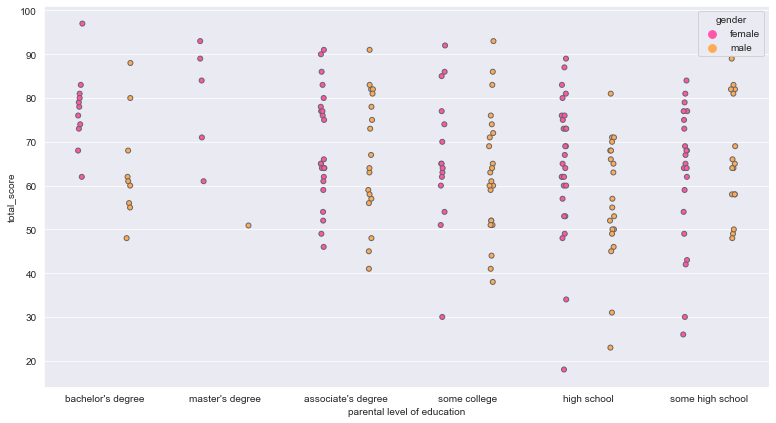

In [45]:
sbn.stripplot(x='parental level of education',y='total_score',data=group_b,palette='spring',linewidth=1,jitter=0.04,hue='gender',split=True)

In [46]:
group_b.groupby(['parental level of education','status']).count()

gender  race/ethnicity  math score  \
parental level of education status                                       
associate's degree          F            2               2           2   
                            P           39              39          39   
bachelor's degree           P           20              20          20   
high school                 F            5               5           5   
                            P           43              43          43   
master's degree             P            6               6           6   
some college                F            4               4           4   
                            P           33              33          33   
some high school            F            4               4           4   
                            P           34              34          34   

                                    reading score  writing score  total_score  \
parental level of education status                                              
associate's degree          F                   2              2            2   
                            P                  39             39           39   
bachelor's degree           P                  20             20           20   
high school                 F                   5              5            5   
                            P                  43             43           43   
master's degree             P                   6              6            6   
some college                F                   4              4            4   
                            P                  33             33           33   
some high school            F                   4              4            4   
                            P                  34             34           34   

                                    grade  
parental level of education status         
associate's degree          F           2  
                            P          39  
bachelor's degree           P          20  
high school                 F           5  
                            P          43  
master's degree             P           6  
some college                F           4  
                            P          33  
some high school            F           4  
                            P          34

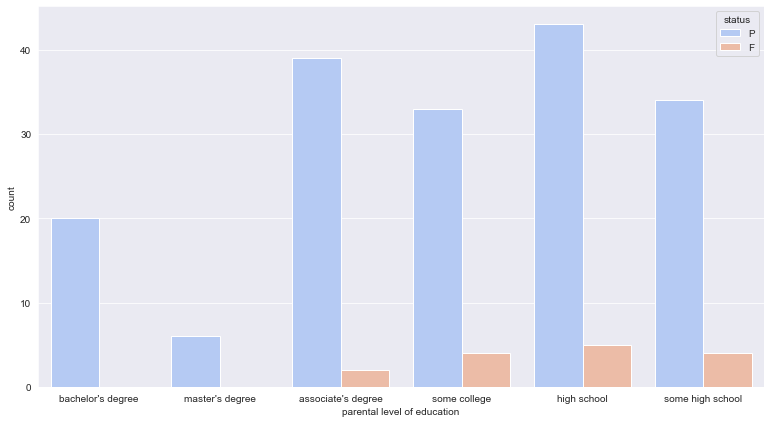

In [47]:
sbn.countplot(x='parental level of education',data=group_b,hue='status',palette='coolwarm')

In [48]:
group_b.groupby(['gender','status']).count()

race/ethnicity  parental level of education  math score  \
gender status                                                            
female F                    7                            7           7   
       P                   97                           97          97   
male   F                    8                            8           8   
       P                   78                           78          78   

               reading score  writing score  total_score  grade  
gender status                                                    
female F                   7              7            7      7  
       P                  97             97           97     97  
male   F                   8              8            8      8  
       P                  78             78           78     78

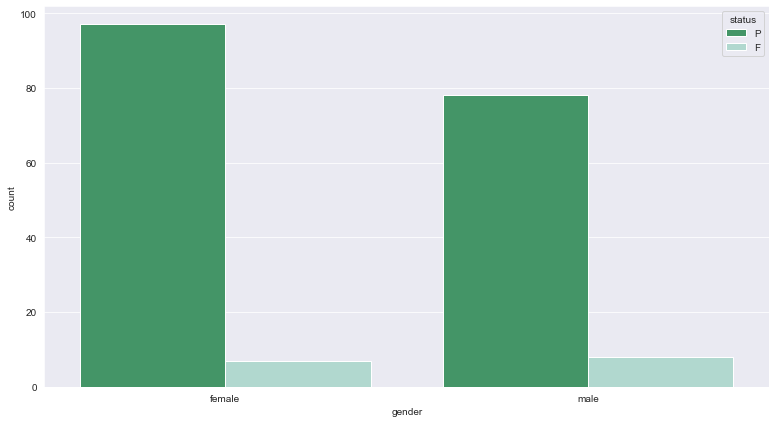

In [49]:
sbn.countplot(x='gender',data=group_b,hue='status',palette='BuGn_r')

In [50]:
group_b.groupby(['grade']).count()

,gender,race/ethnicity,parental level of education,math score,reading score,writing score,total_score,status
grade,,,,,,,,
A,50,50,50,50,50,50,50,50
B,69,69,69,69,69,69,69,69
C,45,45,45,45,45,45,45,45
F,19,19,19,19,19,19,19,19
O,7,7,7,7,7,7,7,7


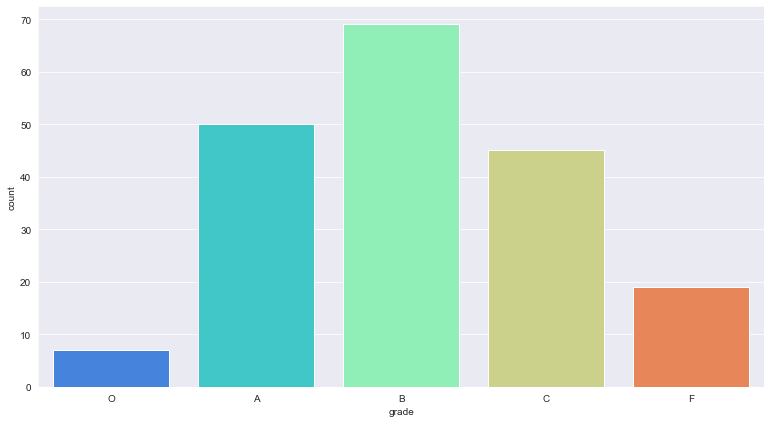

In [51]:
sbn.countplot(x='grade',data=group_b,order=['O','A','B','C','F'],palette='rainbow')

In [52]:
group_b.groupby(['parental level of education','grade']).count()

gender  race/ethnicity  math score  \
parental level of education grade                                       
associate's degree          A          14              14          14   
                            B          12              12          12   
                            C          11              11          11   
                            F           1               1           1   
                            O           3               3           3   
bachelor's degree           A           8               8           8   
                            B           7               7           7   
                            C           3               3           3   
                            F           1               1           1   
                            O           1               1           1   
high school                 A           9               9           9   
                            B          19              19          19   
                            C          14              14          14   
                            F           6               6           6   
master's degree             A           2               2           2   
                            B           2               2           2   
                            C           1               1           1   
                            O           1               1           1   
some college                A           6               6           6   
                            B          15              15          15   
                            C           7               7           7   
                            F           7               7           7   
                            O           2               2           2   
some high school            A          11              11          11   
                            B          14              14          14   
                            C           9               9           9   
                            F           4               4           4   

                                   reading score  writing score  total_score  \
parental level of education grade                                              
associate's degree          A                 14             14           14   
                            B                 12             12           12   
                            C                 11             11           11   
                            F                  1              1            1   
                            O                  3              3            3   
bachelor's degree           A                  8              8            8   
                            B                  7              7            7   
                            C                  3              3            3   
                            F                  1              1            1   
                            O                  1              1            1   
high school                 A                  9              9            9   
                            B                 19             19           19   
                            C                 14             14           14   
                            F                  6              6            6   
master's degree             A                  2              2            2   
                            B                  2              2            2   
                            C                  1              1            1   
                            O                  1              1            1   
some college                A                  6              6            6   
                            B                 15             15           15   
                            C                  7              7            7   
                            F                  7              7            7 

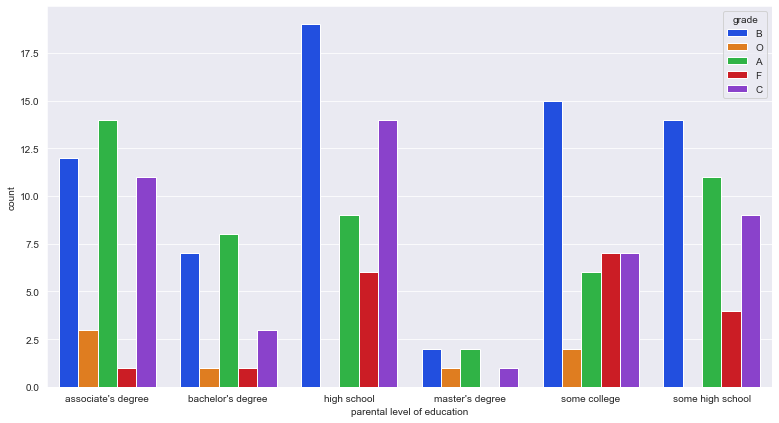

In [53]:
sbn.countplot(x='parental level of education', data = group_b, hue='grade', palette='bright',order=["associate's degree","bachelor's degree","high school","master's degree","some college","some high school"])

# GROUP C

In [54]:
group_C=data['race/ethnicity']=='group C'
group_c = data.loc[group_C,['gender','race/ethnicity','parental level of education','math score','reading score','writing score','total_score']]
group_c

,gender,race/ethnicity,parental level of education,math score,reading score,writing score,total_score
1,female,group C,some college,69,90,88,82.0
4,male,group C,some college,76,78,75,76.0
10,male,group C,associate's degree,58,54,52,55.0
15,female,group C,some high school,69,75,78,74.0
16,male,group C,high school,88,89,86,88.0
...,...,...,...,...,...,...,...
979,female,group C,associate's degree,91,95,94,93.0
984,female,group C,some high school,74,75,82,77.0
986,female,group C,associate's degree,40,59,51,50.0
996,male,group C,high school,62,55,55,57.0


In [55]:
passing_marks=45.0
group_c['status'] = np.where(group_c['total_score']>passing_marks,'P','F')

In [56]:
group_c

,gender,race/ethnicity,parental level of education,math score,reading score,writing score,total_score,status
1,female,group C,some college,69,90,88,82.0,P
4,male,group C,some college,76,78,75,76.0,P
10,male,group C,associate's degree,58,54,52,55.0,P
15,female,group C,some high school,69,75,78,74.0,P
16,male,group C,high school,88,89,86,88.0,P
...,...,...,...,...,...,...,...,...
979,female,group C,associate's degree,91,95,94,93.0,P
984,female,group C,some high school,74,75,82,77.0,P
986,female,group C,associate's degree,40,59,51,50.0,P
996,male,group C,high school,62,55,55,57.0,P


In [57]:
result=group_c['status'].value_counts()
result

P    300
F     19
Name: status, dtype: int64

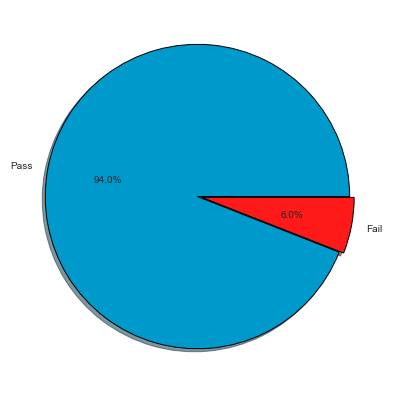

In [58]:
plt.pie(result,wedgeprops={'edgecolor':'black'},labels=['Pass','Fail'],colors=colors,autopct='%1.1f%%',explode=[0,0.03],shadow=True)
plt.show()

In [59]:
lvl_of_edu=group_c.groupby(['parental level of education','total_score','gender']).mean()
lvl_of_edu

math score  reading score  \
parental level of education total_score gender                              
associate's degree          40.0        male          47.0           37.0   
                            44.0        male          46.0           43.0   
                            46.0        male          43.0           45.0   
                            48.0        male          49.0           51.0   
                            50.0        female        40.0           59.0   
...                                                    ...            ...   
some high school            81.0        female        71.0           84.0   
                            83.0        female        76.0           87.0   
                            84.0        female        77.0           90.0   
                            85.0        female        77.0           91.0   
                            90.0        female        85.0           92.0   

                                                writing score  
parental level of education total_score gender                 
associate's degree          40.0        male             35.0  
                            44.0        male             42.0  
                            46.0        male             50.0  
                            48.0        male             43.0  
                            50.0        female           51.0  
...                                                       ...  
some high school            81.0        female           87.0  
                            83.0        female           85.0  
                            84.0        female           85.0  
                            85.0        female           88.0  
                            90.0        female           93.0  

[247 rows x 3 columns]

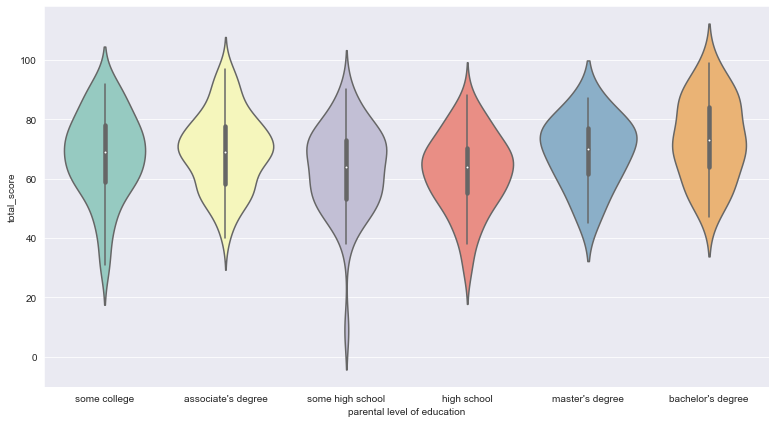

In [60]:
sbn.violinplot(x='parental level of education',y='total_score',data=group_c)

c:\users\ss\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


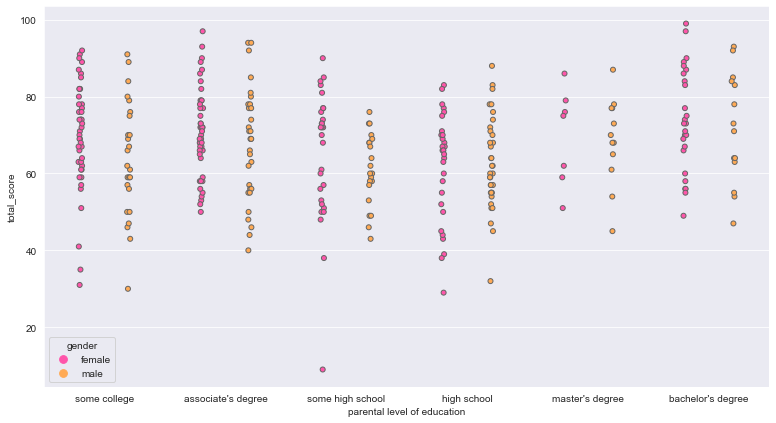

In [61]:
sbn.stripplot(x='parental level of education',y='total_score',data=group_c,jitter=0.03,linewidth=1,hue='gender',split=True,palette='spring')

In [62]:
group_c.groupby(['parental level of education','status']).count()

gender  race/ethnicity  math score  \
parental level of education status                                       
associate's degree          F            2               2           2   
                            P           76              76          76   
bachelor's degree           P           40              40          40   
high school                 F            8               8           8   
                            P           56              56          56   
master's degree             F            1               1           1   
                            P           18              18          18   
some college                F            5               5           5   
                            P           64              64          64   
some high school            F            3               3           3   
                            P           46              46          46   

                                    reading score  writing score  total_score  
parental level of education status                                             
associate's degree          F                   2              2            2  
                            P                  76             76           76  
bachelor's degree           P                  40             40           40  
high school                 F                   8              8            8  
                            P                  56             56           56  
master's degree             F                   1              1            1  
                            P                  18             18           18  
some college                F                   5              5            5  
                            P                  64             64           64  
some high school            F                   3              3            3  
                            P                  46             46           46

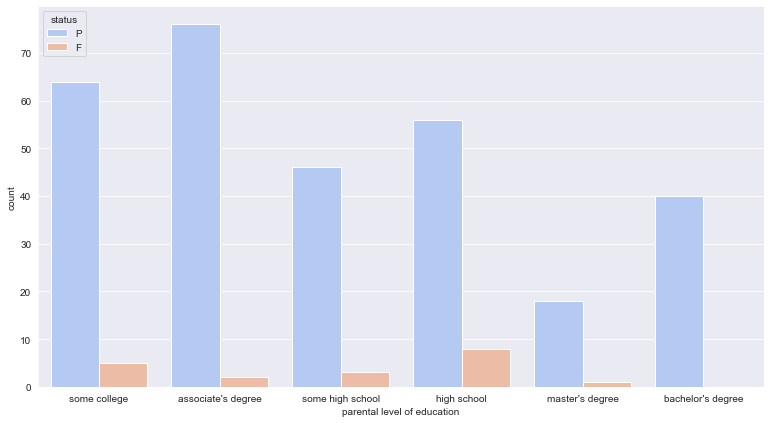

In [63]:
sbn.countplot(x='parental level of education',data=group_c,hue='status',palette='coolwarm')

In [64]:
group_c.groupby(['parental level of education','gender']).count()

race/ethnicity  math score  reading score  \
parental level of education gender                                              
associate's degree          female              45          45             45   
                            male                33          33             33   
bachelor's degree           female              26          26             26   
                            male                14          14             14   
high school                 female              30          30             30   
                            male                34          34             34   
master's degree             female               7           7              7   
                            male                12          12             12   
some college                female              44          44             44   
                            male                25          25             25   
some high school            female              28          28             28   
                            male                21          21             21   

                                    writing score  total_score  status  
parental level of education gender                                      
associate's degree          female             45           45      45  
                            male               33           33      33  
bachelor's degree           female             26           26      26  
                            male               14           14      14  
high school                 female             30           30      30  
                            male               34           34      34  
master's degree             female              7            7       7  
                            male               12           12      12  
some college                female             44           44      44  
                            male               25           25      25  
some high school            female             28           28      28  
                            male               21           21      21

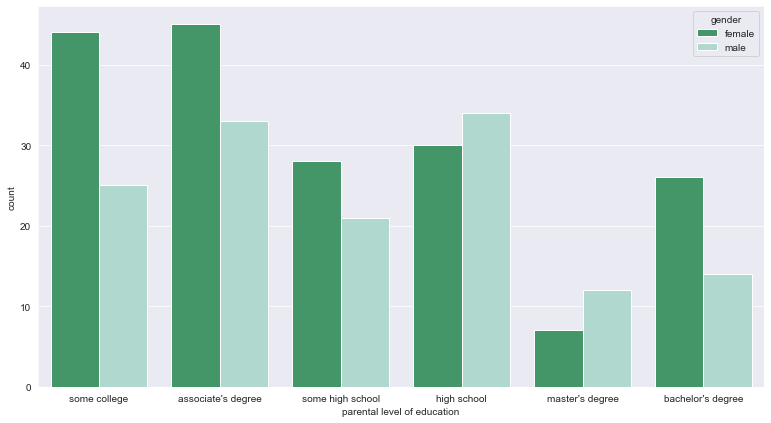

In [65]:
sbn.countplot(x='parental level of education',data=group_c,hue='gender',palette='BuGn_r')

In [66]:
def grade (marks):
    if (marks>=90):
        return 'O'
    elif (marks>=75) and(marks<90):
        return 'A'
    elif (marks>=60) and(marks<75):
        return 'B'
    elif (marks>=45) and(marks<60):
        return 'C'
    else:
        return 'F'
    
    

In [67]:
group_c['grade']=group_c['total_score'].apply(grade)

In [68]:
group_c

,gender,race/ethnicity,parental level of education,math score,reading score,writing score,total_score,status,grade
1,female,group C,some college,69,90,88,82.0,P,A
4,male,group C,some college,76,78,75,76.0,P,A
10,male,group C,associate's degree,58,54,52,55.0,P,C
15,female,group C,some high school,69,75,78,74.0,P,B
16,male,group C,high school,88,89,86,88.0,P,A
...,...,...,...,...,...,...,...,...,...
979,female,group C,associate's degree,91,95,94,93.0,P,O
984,female,group C,some high school,74,75,82,77.0,P,A
986,female,group C,associate's degree,40,59,51,50.0,P,C
996,male,group C,high school,62,55,55,57.0,P,C


In [69]:
group_c.groupby(['grade']).count()

,gender,race/ethnicity,parental level of education,math score,reading score,writing score,total_score,status
grade,,,,,,,,
A,79,79,79,79,79,79,79,79
B,128,128,128,128,128,128,128,128
C,80,80,80,80,80,80,80,80
F,16,16,16,16,16,16,16,16
O,16,16,16,16,16,16,16,16


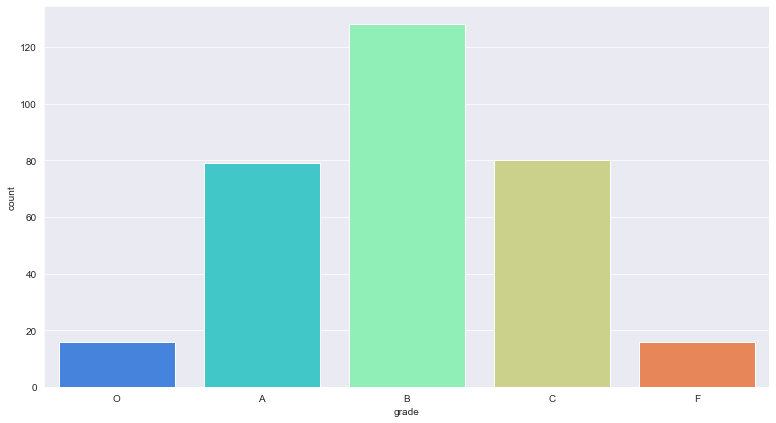

In [70]:
sbn.countplot(x='grade',data=group_c,palette='rainbow',order=['O','A','B','C','F'])

In [71]:
group_c.groupby(['parental level of education','grade']).count()

gender  race/ethnicity  math score  \
parental level of education grade                                       
associate's degree          A          20              20          20   
                            B          31              31          31   
                            C          19              19          19   
                            F           2               2           2   
                            O           6               6           6   
bachelor's degree           A          12              12          12   
                            B          15              15          15   
                            C           8               8           8   
                            O           5               5           5   
high school                 A          12              12          12   
                            B          27              27          27   
                            C          19              19          19   
                            F           6               6           6   
master's degree             A           8               8           8   
                            B           7               7           7   
                            C           4               4           4   
some college                A          19              19          19   
                            B          27              27          27   
                            C          14              14          14   
                            F           5               5           5   
                            O           4               4           4   
some high school            A           8               8           8   
                            B          21              21          21   
                            C          16              16          16   
                            F           3               3           3   
                            O           1               1           1   

                                   reading score  writing score  total_score  \
parental level of education grade                                              
associate's degree          A                 20             20           20   
                            B                 31             31           31   
                            C                 19             19           19   
                            F                  2              2            2   
                            O                  6              6            6   
bachelor's degree           A                 12             12           12   
                            B                 15             15           15   
                            C                  8              8            8   
                            O                  5              5            5   
high school                 A                 12             12           12   
                            B                 27             27           27   
                            C                 19             19           19   
                            F                  6              6            6   
master's degree             A                  8              8            8   
                            B                  7              7            7   
                            C                  4              4            4   
some college                A                 19             19           19   
                            B                 27             27           27   
                            C                 14             14           14   
                            F                  5              5            5   
                            O                  4              4            4   
some high school            A                  8              8            8   
                            B                 21             21       

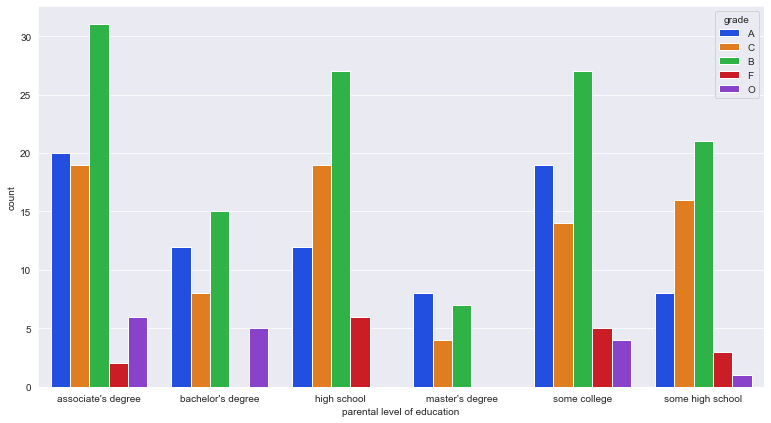

In [72]:
sbn.countplot(x='parental level of education',data=group_c,hue='grade',palette='bright',order=["associate's degree","bachelor's degree","high school","master's degree","some college","some high school"])

# GROUP D

In [73]:
group_D=data['race/ethnicity']=='group D'
group_d = data.loc[group_D,['gender','race/ethnicity','parental level of education','math score','reading score','writing score','total_score']]
group_d

,gender,race/ethnicity,parental level of education,math score,reading score,writing score,total_score
8,male,group D,high school,64,64,67,65.0
11,male,group D,associate's degree,40,52,43,45.0
20,male,group D,high school,66,69,63,66.0
22,male,group D,some college,44,54,53,50.0
24,male,group D,bachelor's degree,74,71,80,75.0
...,...,...,...,...,...,...,...
989,female,group D,some college,67,86,83,79.0
992,female,group D,associate's degree,55,76,76,69.0
993,female,group D,bachelor's degree,62,72,74,69.0
998,female,group D,some college,68,78,77,74.0


In [74]:
passing_marks=45.0
group_d['status'] = np.where(group_d['total_score']>passing_marks,'P','F')

In [75]:
group_d

,gender,race/ethnicity,parental level of education,math score,reading score,writing score,total_score,status
8,male,group D,high school,64,64,67,65.0,P
11,male,group D,associate's degree,40,52,43,45.0,F
20,male,group D,high school,66,69,63,66.0,P
22,male,group D,some college,44,54,53,50.0,P
24,male,group D,bachelor's degree,74,71,80,75.0,P
...,...,...,...,...,...,...,...,...
989,female,group D,some college,67,86,83,79.0,P
992,female,group D,associate's degree,55,76,76,69.0,P
993,female,group D,bachelor's degree,62,72,74,69.0,P
998,female,group D,some college,68,78,77,74.0,P


In [76]:
result=group_d['status'].value_counts()
result

P    253
F      9
Name: status, dtype: int64

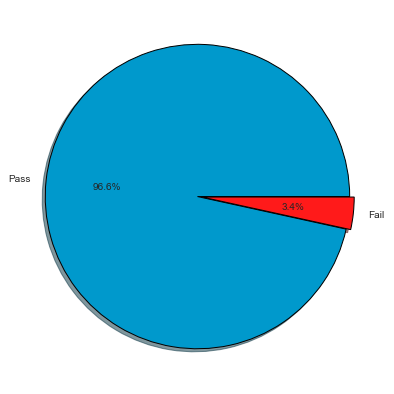

In [77]:
plt.pie(result,wedgeprops={'edgecolor':'black'},labels=['Pass','Fail'],colors=colors,autopct='%1.1f%%',explode=[0,0.03],shadow=True)
plt.show()

In [78]:
lvl_of_edu=group_c.groupby(['parental level of education','total_score']).mean()
lvl_of_edu

math score  reading score  \
parental level of education total_score                              
associate's degree          40.0               47.0           37.0   
                            44.0               46.0           43.0   
                            46.0               43.0           45.0   
                            48.0               49.0           51.0   
                            50.0               44.5           55.0   
...                                             ...            ...   
some high school            81.0               71.0           84.0   
                            83.0               76.0           87.0   
                            84.0               77.0           90.0   
                            85.0               77.0           91.0   
                            90.0               85.0           92.0   

                                         writing score  
parental level of education total_score                 
associate's degree          40.0                  35.0  
                            44.0                  42.0  
                            46.0                  50.0  
                            48.0                  43.0  
                            50.0                  51.0  
...                                                ...  
some high school            81.0                  87.0  
                            83.0                  85.0  
                            84.0                  85.0  
                            85.0                  88.0  
                            90.0                  93.0  

[199 rows x 3 columns]

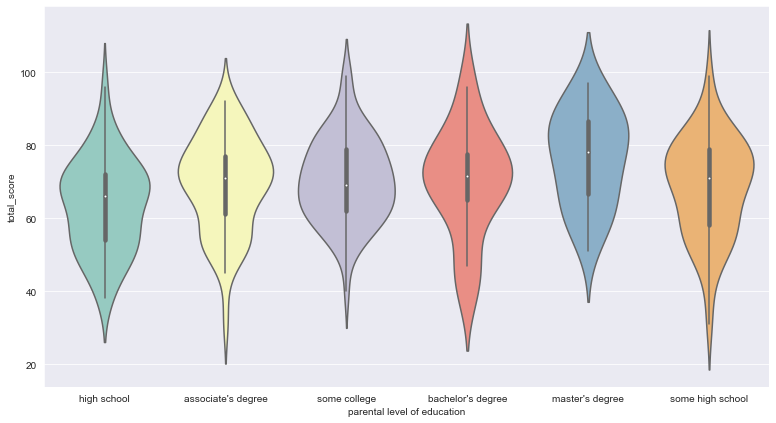

In [79]:
sbn.violinplot(x='parental level of education',y='total_score',data=group_d)

c:\users\ss\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


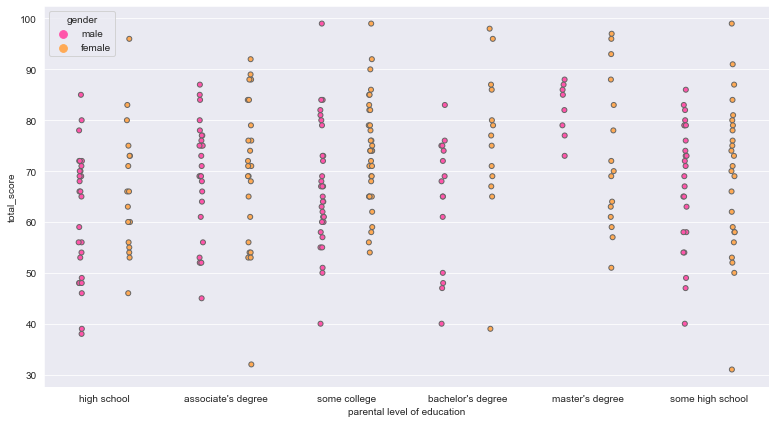

In [80]:
sbn.stripplot(x='parental level of education',y='total_score',data=group_d,jitter=0.03,linewidth=1,hue='gender',split=True,palette='spring')

In [81]:
group_d.groupby(['parental level of education','status']).count()

gender  race/ethnicity  math score  \
parental level of education status                                       
associate's degree          F            2               2           2   
                            P           48              48          48   
bachelor's degree           F            2               2           2   
                            P           26              26          26   
high school                 F            2               2           2   
                            P           42              42          42   
master's degree             P           23              23          23   
some college                F            1               1           1   
                            P           66              66          66   
some high school            F            2               2           2   
                            P           48              48          48   

                                    reading score  writing score  total_score  
parental level of education status                                             
associate's degree          F                   2              2            2  
                            P                  48             48           48  
bachelor's degree           F                   2              2            2  
                            P                  26             26           26  
high school                 F                   2              2            2  
                            P                  42             42           42  
master's degree             P                  23             23           23  
some college                F                   1              1            1  
                            P                  66             66           66  
some high school            F                   2              2            2  
                            P                  48             48           48

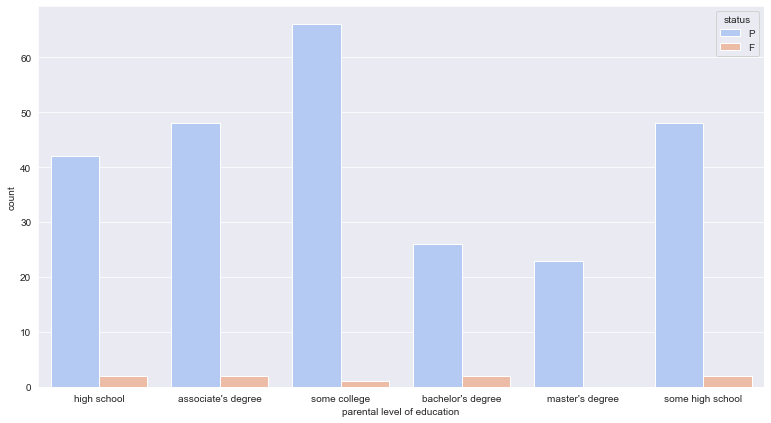

In [82]:
sbn.countplot(x='parental level of education',data=group_d,hue='status',palette='coolwarm')

In [83]:
group_d.groupby(['parental level of education','gender']).count()

race/ethnicity  math score  reading score  \
parental level of education gender                                              
associate's degree          female              24          24             24   
                            male                26          26             26   
bachelor's degree           female              13          13             13   
                            male                15          15             15   
high school                 female              17          17             17   
                            male                27          27             27   
master's degree             female              15          15             15   
                            male                 8           8              8   
some college                female              35          35             35   
                            male                32          32             32   
some high school            female              25          25             25   
                            male                25          25             25   

                                    writing score  total_score  status  
parental level of education gender                                      
associate's degree          female             24           24      24  
                            male               26           26      26  
bachelor's degree           female             13           13      13  
                            male               15           15      15  
high school                 female             17           17      17  
                            male               27           27      27  
master's degree             female             15           15      15  
                            male                8            8       8  
some college                female             35           35      35  
                            male               32           32      32  
some high school            female             25           25      25  
                            male               25           25      25

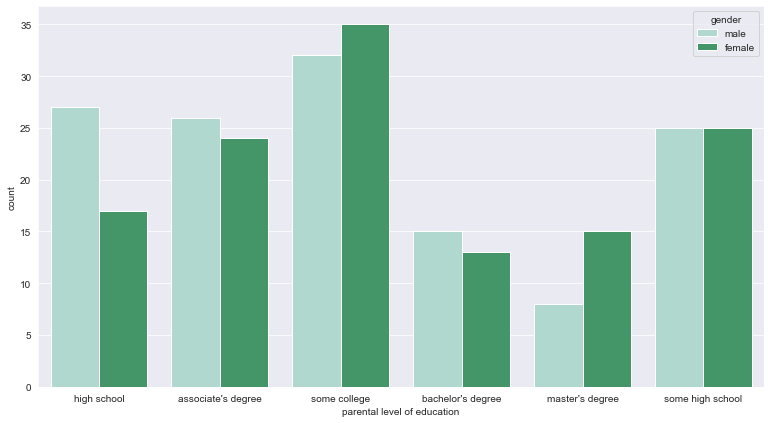

In [84]:
sbn.countplot(x='parental level of education',data=group_d,hue='gender',palette='BuGn')

In [85]:
def grade (marks):
    if (marks>=90):
        return 'O'
    elif (marks>=75) and(marks<90):
        return 'A'
    elif (marks>=60) and(marks<75):
        return 'B'
    elif (marks>=45) and(marks<60):
        return 'C'
    else:
        return 'F'

In [86]:
group_d['grade']=group_d['total_score'].apply(grade)

In [87]:
group_d

,gender,race/ethnicity,parental level of education,math score,reading score,writing score,total_score,status,grade
8,male,group D,high school,64,64,67,65.0,P,B
11,male,group D,associate's degree,40,52,43,45.0,F,C
20,male,group D,high school,66,69,63,66.0,P,B
22,male,group D,some college,44,54,53,50.0,P,C
24,male,group D,bachelor's degree,74,71,80,75.0,P,A
...,...,...,...,...,...,...,...,...,...
989,female,group D,some college,67,86,83,79.0,P,A
992,female,group D,associate's degree,55,76,76,69.0,P,B
993,female,group D,bachelor's degree,62,72,74,69.0,P,B
998,female,group D,some college,68,78,77,74.0,P,B


In [88]:
group_d.groupby(['grade']).count()

,gender,race/ethnicity,parental level of education,math score,reading score,writing score,total_score,status
grade,,,,,,,,
A,79,79,79,79,79,79,79,79
B,107,107,107,107,107,107,107,107
C,55,55,55,55,55,55,55,55
F,8,8,8,8,8,8,8,8
O,13,13,13,13,13,13,13,13


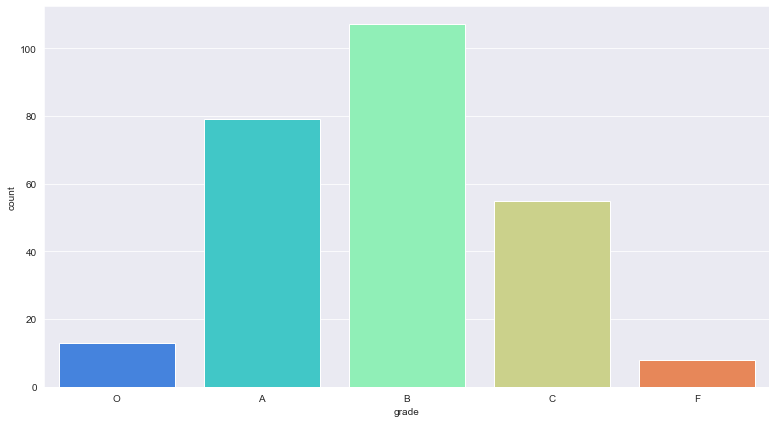

In [89]:
sbn.countplot(x='grade',data=group_d,palette='rainbow',order=['O','A','B','C','F'])

In [90]:
group_d.groupby(['parental level of education','grade']).count()

gender  race/ethnicity  math score  \
parental level of education grade                                       
associate's degree          A          19              19          19   
                            B          18              18          18   
                            C          11              11          11   
                            F           1               1           1   
                            O           1               1           1   
bachelor's degree           A          10              10          10   
                            B          11              11          11   
                            C           3               3           3   
                            F           2               2           2   
                            O           2               2           2   
high school                 A           6               6           6   
                            B          20              20          20   
                            C          15              15          15   
                            F           2               2           2   
                            O           1               1           1   
master's degree             A          10              10          10   
                            B           7               7           7   
                            C           3               3           3   
                            O           3               3           3   
some college                A          18              18          18   
                            B          34              34          34   
                            C          10              10          10   
                            F           1               1           1   
                            O           4               4           4   
some high school            A          16              16          16   
                            B          17              17          17   
                            C          13              13          13   
                            F           2               2           2   
                            O           2               2           2   

                                   reading score  writing score  total_score  \
parental level of education grade                                              
associate's degree          A                 19             19           19   
                            B                 18             18           18   
                            C                 11             11           11   
                            F                  1              1            1   
                            O                  1              1            1   
bachelor's degree           A                 10             10           10   
                            B                 11             11           11   
                            C                  3              3            3   
                            F                  2              2            2   
                            O                  2              2            2   
high school                 A                  6              6            6   
                            B                 20             20           20   
                            C                 15             15           15   
                            F                  2              2            2   
                            O                  1              1            1   
master's degree             A                 10             10           10   
                            B                  7              7            7   
                            C                  3              3            3   
                            O                  3              3            3   
some college                A                 18             18           18   
           

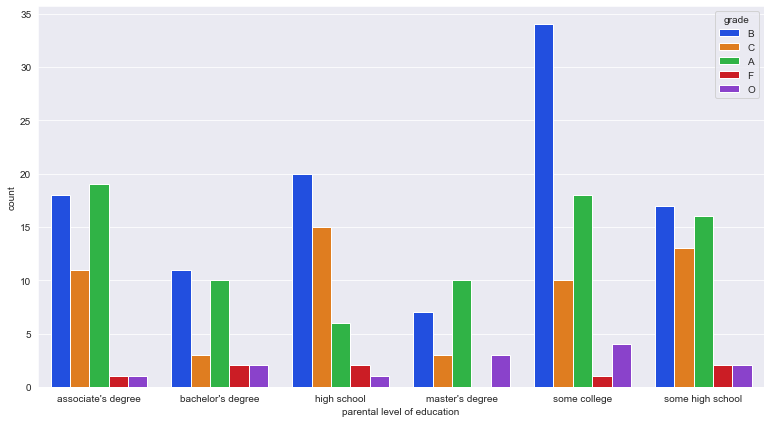

In [91]:
sbn.countplot(x='parental level of education',data=group_d,hue='grade',palette='bright',order=["associate's degree","bachelor's degree","high school","master's degree","some college","some high school"])

# GROUP E

In [92]:
group_E=data['race/ethnicity']=='group E'
group_e = data.loc[group_E,['gender','race/ethnicity','parental level of education','math score','reading score','writing score','total_score']]
group_e

,gender,race/ethnicity,parental level of education,math score,reading score,writing score,total_score
32,female,group E,master's degree,56,72,65,64.0
34,male,group E,some college,97,87,82,89.0
35,male,group E,associate's degree,81,81,79,80.0
44,female,group E,associate's degree,50,56,54,53.0
50,male,group E,some college,53,55,48,52.0
...,...,...,...,...,...,...,...
962,female,group E,associate's degree,100,100,100,100.0
968,female,group E,associate's degree,68,76,67,70.0
987,male,group E,some high school,81,75,76,77.0
990,male,group E,high school,86,81,75,81.0


In [93]:
passing_score=45.0
group_e['status']=np.where(group_e['total_score']>passing_score,'P','F')

In [94]:
group_e

,gender,race/ethnicity,parental level of education,math score,reading score,writing score,total_score,status
32,female,group E,master's degree,56,72,65,64.0,P
34,male,group E,some college,97,87,82,89.0,P
35,male,group E,associate's degree,81,81,79,80.0,P
44,female,group E,associate's degree,50,56,54,53.0,P
50,male,group E,some college,53,55,48,52.0,P
...,...,...,...,...,...,...,...,...
962,female,group E,associate's degree,100,100,100,100.0,P
968,female,group E,associate's degree,68,76,67,70.0,P
987,male,group E,some high school,81,75,76,77.0,P
990,male,group E,high school,86,81,75,81.0,P


In [95]:
result=group_e['status'].value_counts()

In [96]:
result

P    133
F      7
Name: status, dtype: int64

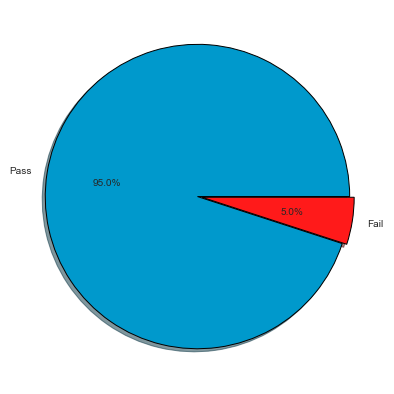

In [97]:
plt.pie(result,wedgeprops={'edgecolor':'black'},labels=['Pass','Fail'],colors=colors,autopct='%1.1f%%',explode=[0,0.03],shadow=True)
plt.show()

In [98]:
lvl_of_edu=group_d.groupby(['parental level of education','total_score']).mean()
lvl_of_edu

math score  reading score  \
parental level of education total_score                              
associate's degree          32.0          26.000000      31.000000   
                            45.0          40.000000      52.000000   
                            52.0          55.333333      52.333333   
                            53.0          48.333333      55.333333   
                            54.0          42.500000      60.500000   
...                                             ...            ...   
some high school            84.0          80.000000      90.000000   
                            86.0          89.000000      88.000000   
                            87.0          80.000000      92.000000   
                            91.0          81.000000      97.000000   
                            99.0          97.000000     100.000000   

                                         writing score  
parental level of education total_score                 
associate's degree          32.0             38.000000  
                            45.0             43.000000  
                            52.0             47.666667  
                            53.0             55.000000  
                            54.0             58.000000  
...                                                ...  
some high school            84.0             82.000000  
                            86.0             82.000000  
                            87.0             88.000000  
                            91.0             96.000000  
                            99.0            100.000000  

[170 rows x 3 columns]

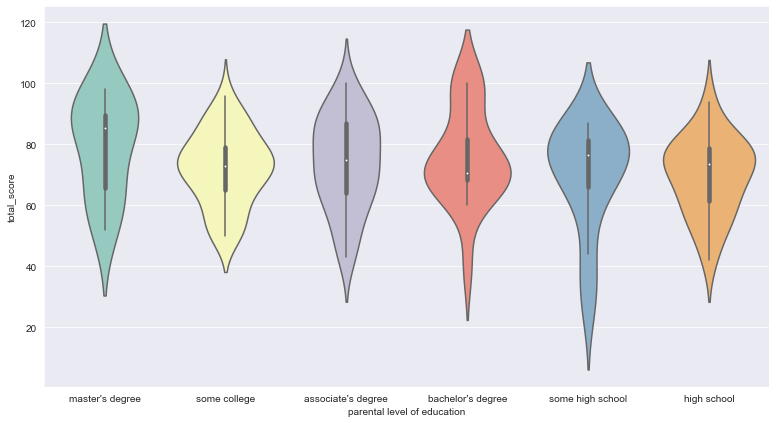

In [99]:
sbn.violinplot(x='parental level of education',y='total_score',data=group_e)

c:\users\ss\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


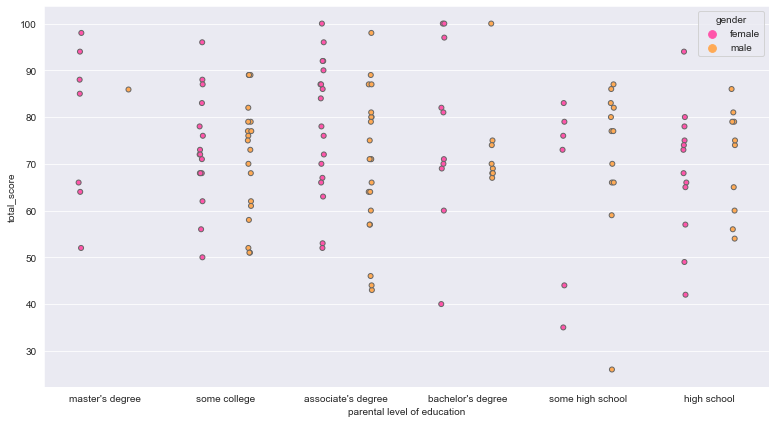

In [100]:
sbn.stripplot(x='parental level of education',y='total_score',data=group_e,jitter=0.03,linewidth=1,hue='gender',split=True,palette='spring')

In [101]:
group_e.groupby(['parental level of education','status']).count()

gender  race/ethnicity  math score  \
parental level of education status                                       
associate's degree          F            2               2           2   
                            P           37              37          37   
bachelor's degree           F            1               1           1   
                            P           17              17          17   
high school                 F            1               1           1   
                            P           21              21          21   
master's degree             P            8               8           8   
some college                P           35              35          35   
some high school            F            3               3           3   
                            P           15              15          15   

                                    reading score  writing score  total_score  
parental level of education status                                             
associate's degree          F                   2              2            2  
                            P                  37             37           37  
bachelor's degree           F                   1              1            1  
                            P                  17             17           17  
high school                 F                   1              1            1  
                            P                  21             21           21  
master's degree             P                   8              8            8  
some college                P                  35             35           35  
some high school            F                   3              3            3  
                            P                  15             15           15

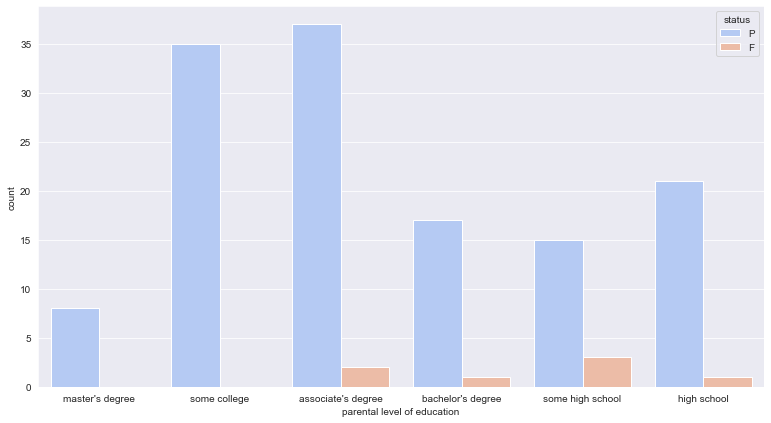

In [102]:
sbn.countplot(x='parental level of education',data=group_e,hue='status',palette='coolwarm')

In [103]:
group_e.groupby(['parental level of education','gender']).count()

race/ethnicity  math score  reading score  \
parental level of education gender                                              
associate's degree          female              18          18             18   
                            male                21          21             21   
bachelor's degree           female              10          10             10   
                            male                 8           8              8   
high school                 female              12          12             12   
                            male                10          10             10   
master's degree             female               7           7              7   
                            male                 1           1              1   
some college                female              16          16             16   
                            male                19          19             19   
some high school            female               6           6              6   
                            male                12          12             12   

                                    writing score  total_score  status  
parental level of education gender                                      
associate's degree          female             18           18      18  
                            male               21           21      21  
bachelor's degree           female             10           10      10  
                            male                8            8       8  
high school                 female             12           12      12  
                            male               10           10      10  
master's degree             female              7            7       7  
                            male                1            1       1  
some college                female             16           16      16  
                            male               19           19      19  
some high school            female              6            6       6  
                            male               12           12      12

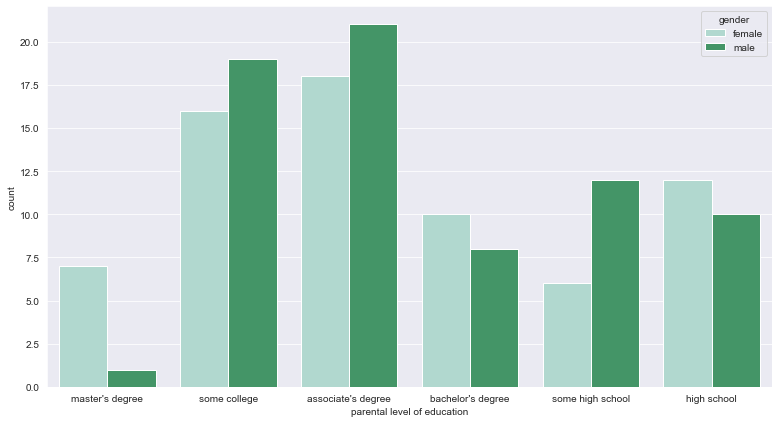

In [104]:
sbn.countplot(x='parental level of education',data=group_e,hue='gender',palette='BuGn')

In [105]:
def grade (marks):
    if (marks>=90):
        return 'O'
    elif (marks>=75) and(marks<90):
        return 'A'
    elif (marks>=60) and(marks<75):
        return 'B'
    elif (marks>=45) and(marks<60):
        return 'C'
    else:
        return 'F'

In [106]:
group_e['grade']=group_e['total_score'].apply(grade)
group_e

,gender,race/ethnicity,parental level of education,math score,reading score,writing score,total_score,status,grade
32,female,group E,master's degree,56,72,65,64.0,P,B
34,male,group E,some college,97,87,82,89.0,P,A
35,male,group E,associate's degree,81,81,79,80.0,P,A
44,female,group E,associate's degree,50,56,54,53.0,P,C
50,male,group E,some college,53,55,48,52.0,P,C
...,...,...,...,...,...,...,...,...,...
962,female,group E,associate's degree,100,100,100,100.0,P,O
968,female,group E,associate's degree,68,76,67,70.0,P,B
987,male,group E,some high school,81,75,76,77.0,P,A
990,male,group E,high school,86,81,75,81.0,P,A


In [107]:
group_e.groupby(['grade']).count()

,gender,race/ethnicity,parental level of education,math score,reading score,writing score,total_score,status
grade,,,,,,,,
A,53,53,53,53,53,53,53,53
B,49,49,49,49,49,49,49,49
C,17,17,17,17,17,17,17,17
F,7,7,7,7,7,7,7,7
O,14,14,14,14,14,14,14,14


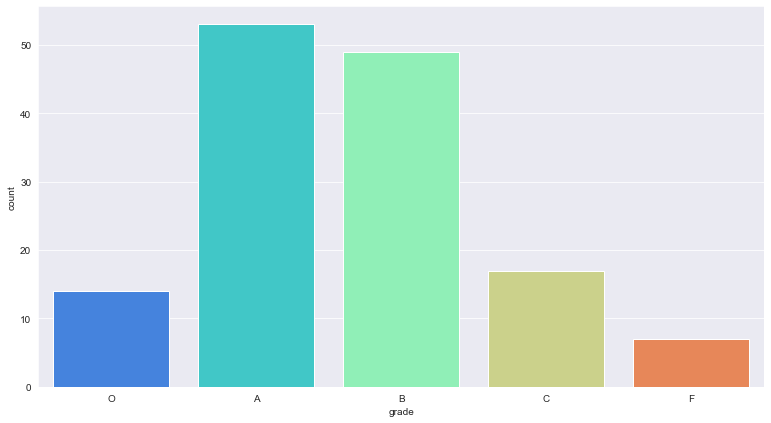

In [108]:
sbn.countplot(x='grade',data=group_e,palette='rainbow',order=['O','A','B','C','F'])

In [109]:
group_e.groupby(['parental level of education','grade']).count()

gender  race/ethnicity  math score  \
parental level of education grade                                       
associate's degree          A          14              14          14   
                            B          12              12          12   
                            C           5               5           5   
                            F           2               2           2   
                            O           6               6           6   
bachelor's degree           A           3               3           3   
                            B          10              10          10   
                            F           1               1           1   
                            O           4               4           4   
high school                 A           8               8           8   
                            B           8               8           8   
                            C           4               4           4   
                            F           1               1           1   
                            O           1               1           1   
master's degree             A           3               3           3   
                            B           2               2           2   
                            C           1               1           1   
                            O           2               2           2   
some college                A          15              15          15   
                            B          13              13          13   
                            C           6               6           6   
                            O           1               1           1   
some high school            A          10              10          10   
                            B           4               4           4   
                            C           1               1           1   
                            F           3               3           3   

                                   reading score  writing score  total_score  \
parental level of education grade                                              
associate's degree          A                 14             14           14   
                            B                 12             12           12   
                            C                  5              5            5   
                            F                  2              2            2   
                            O                  6              6            6   
bachelor's degree           A                  3              3            3   
                            B                 10             10           10   
                            F                  1              1            1   
                            O                  4              4            4   
high school                 A                  8              8            8   
                            B                  8              8            8   
                            C                  4              4            4   
                            F                  1              1            1   
                            O                  1              1            1   
master's degree             A                  3              3            3   
                            B                  2              2            2   
                            C                  1              1            1   
                            O                  2              2            2   
some college                A                 15             15           15   
                            B                 13             13           13   
                            C                  6              6            6   
                            O                  1              1            1   
some high school            A                 10             10       

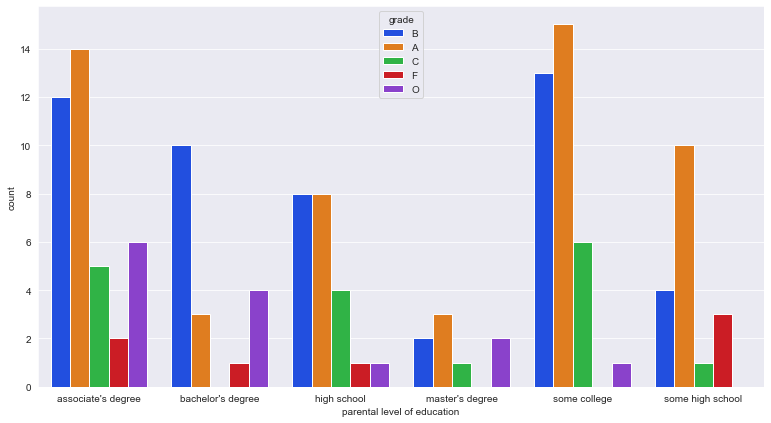

In [110]:
sbn.countplot(x='parental level of education',data=group_e,hue='grade',palette='bright',order=["associate's degree","bachelor's degree","high school","master's degree","some college","some high school"])

# OVERALL SURVEY

In [112]:
data.head(2)

,gender,race/ethnicity,parental level of education,lunch,math score,reading score,writing score,total_score
0,female,group B,bachelor's degree,standard,72,72,74,73.0
1,female,group C,some college,standard,69,90,88,82.0


In [118]:
data.groupby(['race/ethnicity','parental level of education']).count()

gender  lunch  math score  \
race/ethnicity parental level of education                              
group A        associate's degree               14     14          14   
               bachelor's degree                12     12          12   
               high school                      18     18          18   
               master's degree                   3      3           3   
               some college                     18     18          18   
               some high school                 24     24          24   
group B        associate's degree               41     41          41   
               bachelor's degree                20     20          20   
               high school                      48     48          48   
               master's degree                   6      6           6   
               some college                     37     37          37   
               some high school                 38     38          38   
group C        associate's degree               78     78          78   
               bachelor's degree                40     40          40   
               high school                      64     64          64   
               master's degree                  19     19          19   
               some college                     69     69          69   
               some high school                 49     49          49   
group D        associate's degree               50     50          50   
               bachelor's degree                28     28          28   
               high school                      44     44          44   
               master's degree                  23     23          23   
               some college                     67     67          67   
               some high school                 50     50          50   
group E        associate's degree               39     39          39   
               bachelor's degree                18     18          18   
               high school                      22     22          22   
               master's degree                   8      8           8   
               some college                     35     35          35   
               some high school                 18     18          18   

                                            reading score  writing score  \
race/ethnicity parental level of education                                 
group A        associate's degree                      14             14   
               bachelor's degree                       12             12   
               high school                             18             18   
               master's degree                          3              3   
               some college                            18             18   
               some high school                        24             24   
group B        associate's degree                      41             41   
               bachelor's degree                       20             20   
               high school                             48             48   
               master's degree                          6              6   
               some college                            37             37   
               some high school                        38             38   
group C        associate's degree                      78             78   
               bachelor's degree                       40             40   
               high school                             64             64   
               master's degree                         19             19   
               some college                            69             69   
               some high school                        49             49   
group D        associate's degree                      50             50   
               bachelor's degree                       28             28   
               high school         

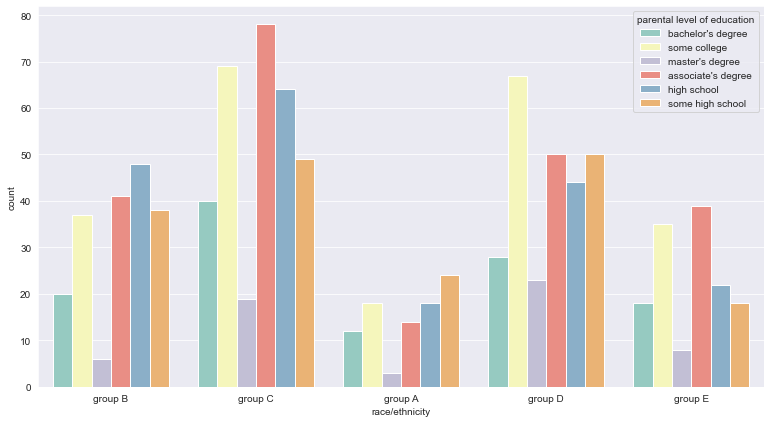

In [117]:
sbn.countplot(x='race/ethnicity',data=data,hue='parental level of education')

In [122]:
data['status']=np.where(data['total_score']>45.0,'P','F')
data

,gender,race/ethnicity,parental level of education,lunch,math score,reading score,writing score,total_score,status
0,female,group B,bachelor's degree,standard,72,72,74,73.0,P
1,female,group C,some college,standard,69,90,88,82.0,P
2,female,group B,master's degree,standard,90,95,93,93.0,P
3,male,group A,associate's degree,free/reduced,47,57,44,49.0,P
4,male,group C,some college,standard,76,78,75,76.0,P
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,88,99,95,94.0,P
996,male,group C,high school,free/reduced,62,55,55,57.0,P
997,female,group C,high school,free/reduced,59,71,65,65.0,P
998,female,group D,some college,standard,68,78,77,74.0,P


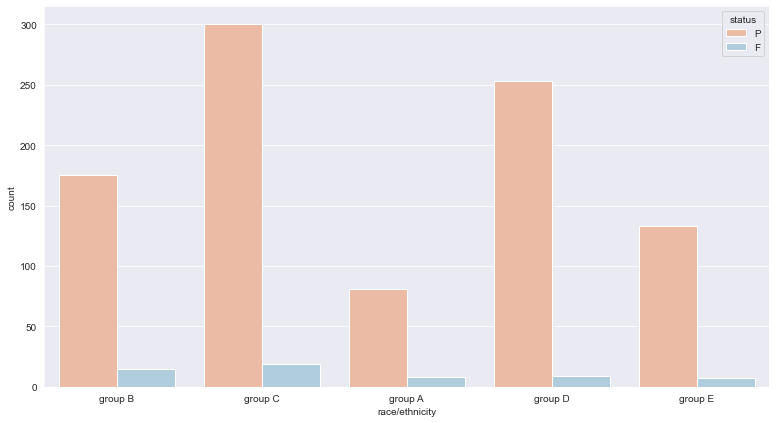

In [124]:
sbn.countplot(x='race/ethnicity',data=data,hue='status',palette='RdBu')

In [125]:
def grade(marks):
    if (marks>=90):
        return '0'
    elif (marks>=75) and (marks<90):
        return 'A'
    elif (marks>=60) and (marks<75):
        return 'B'
    elif (marks>=45) and (marks<60):
        return 'C'
    else:
        return 'F'

In [127]:
data['grade']=data['total_score'].apply(grade)

In [128]:
data

,gender,race/ethnicity,parental level of education,lunch,math score,reading score,writing score,total_score,status,grade
0,female,group B,bachelor's degree,standard,72,72,74,73.0,P,B
1,female,group C,some college,standard,69,90,88,82.0,P,A
2,female,group B,master's degree,standard,90,95,93,93.0,P,0
3,male,group A,associate's degree,free/reduced,47,57,44,49.0,P,C
4,male,group C,some college,standard,76,78,75,76.0,P,A
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,88,99,95,94.0,P,0
996,male,group C,high school,free/reduced,62,55,55,57.0,P,C
997,female,group C,high school,free/reduced,59,71,65,65.0,P,B
998,female,group D,some college,standard,68,78,77,74.0,P,B


In [129]:
data.groupby(['race/ethnicity','grade']).count()

gender  parental level of education  lunch  math score  \
race/ethnicity grade                                                           
group A        0           4                            4      4           4   
               A          17                           17     17          17   
               B          29                           29     29          29   
               C          33                           33     33          33   
               F           6                            6      6           6   
group B        0           7                            7      7           7   
               A          50                           50     50          50   
               B          75                           75     75          75   
               C          45                           45     45          45   
               F          13                           13     13          13   
group C        0          16                           16     16          16   
               A          79                           79     79          79   
               B         128                          128    128         128   
               C          80                           80     80          80   
               F          16                           16     16          16   
group D        0          13                           13     13          13   
               A          79                           79     79          79   
               B         107                          107    107         107   
               C          55                           55     55          55   
               F           8                            8      8           8   
group E        0          14                           14     14          14   
               A          53                           53     53          53   
               B          49                           49     49          49   
               C          17                           17     17          17   
               F           7                            7      7           7   

                      reading score  writing score  total_score  status  
race/ethnicity grade                                                     
group A        0                  4              4            4       4  
               A                 17             17           17      17  
               B                 29             29           29      29  
               C                 33             33           33      33  
               F                  6              6            6       6  
group B        0                  7              7            7       7  
               A                 50             50           50      50  
               B                 75             75           75      75  
               C                 45             45           45      45  
               F                 13             13           13      13  
group C        0                 16             16           16      16  
               A                 79             79           79      79  
               B                128            128          128     128  
               C                 80             80           80      80  
               F                 16             16           16      16  
group D        0                 13             13           13      13  
               A                 79             79           79      79  
               B                107            107          107     107  
               C                 55             55           55      55  
               F                  8              8            8       8  
group E        0                 14             14           14      14  
               A                 53             53           53      53  
               B                 49             49           49      49  
           

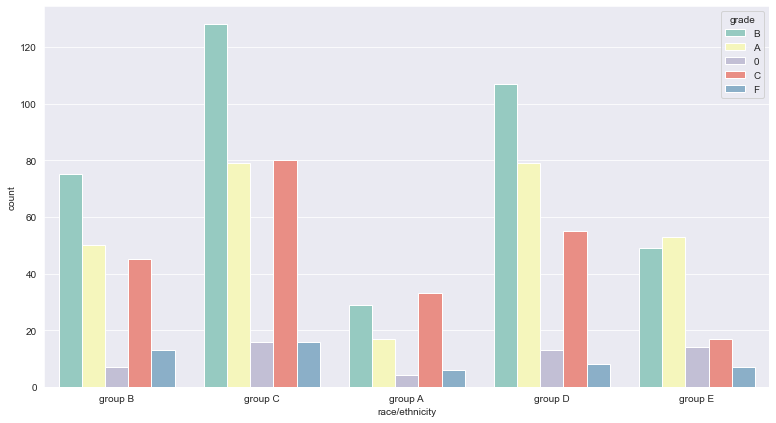

In [130]:
sbn.countplot(x='race/ethnicity',data=data,hue='grade')

In [133]:
status=data['status'].value_counts()
status

P    942
F     58
Name: status, dtype: int64

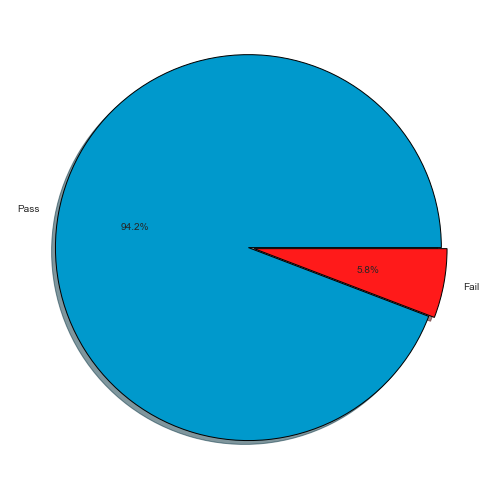

In [135]:
plt.pie(status,wedgeprops={'edgecolor':'black'},labels=['Pass','Fail'],autopct='%1.1f%%',shadow=True,explode=[0,0.03],colors=colors)
plt.tight_layout()
plt.show()

In [ ]:
#hence analysis has been successfully done